### Problem Statement : 
Develop a LLM based Solution for Financial Predictions / Analysis , Use Open Source Transformers, front End Applications like Streamlit to develop your solution. 
#### Sentiment Analysis of Financial tweets of Stocks for a period and correlation with Stock prices or stock Trends 

In [1]:
# !pip install pandas_datareader

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

In [3]:
# Load the dataset
file_path = 'processed_stockemo.csv'
stock_data = pd.read_csv(file_path)

In [4]:
stock_data.head()

,id,date,ticker,senti_label,original,processed,industry
0,0,2020-08-31,AAPL,Bullish,$AAPL you better get back to $130 again 🤔,AAPL you better get back to again thinking face,Information Technology
1,1,2020-08-31,AAPL,Bullish,$AAPL now we just wait for power hour 😎💪🏾,AAPL now we just wait for power hour smiling f...,Information Technology
2,2,2020-08-31,AAPL,Bullish,$AAPL never thought I'd buy this 💰,AAPL never thought I d buy this money bag,Information Technology
3,3,2020-08-31,AAPL,Bullish,$AAPL bought my first option ever with Apple f...,AAPL bought my first option ever with Apple fo...,Information Technology
4,4,2020-08-31,AAPL,Bullish,"$AAPL Buy low, hold for another split in a cou...",AAPL Buy low hold for another split in a coupl...,Information Technology


In [5]:
stock_data['ticker']=stock_data['ticker'].replace('FB', 'META')
stock_data['ticker']=stock_data['ticker'].replace('BRK.A', 'BRK-A')
stock_data['ticker']=stock_data['ticker'].replace('BRK.B', 'BRK-B')
stock_data['ticker'].unique()

array(['AAPL', 'AMT', 'AMZN', 'BA', 'BKNG', 'DIS', 'META', 'MA', 'GOOGL',
       'MCD', 'GOOG', 'NFLX', 'HD', 'NKE', 'JNJ', 'PFE', 'JPM', 'SBUX',
       'MSFT', 'TM', 'NVDA', 'TSM', 'PG', 'UPS', 'PYPL', 'ABNB', 'TSLA',
       'UNH', 'V', 'BABA', 'WMT', 'XOM', 'BAC', 'BRK-A', 'BRK-B', 'CCL',
       'CVX', 'KO', 'LOW'], dtype=object)

In [6]:
stock_data.describe()

,id
count,50281.000000
mean,25140.000000
std,14515.018779
min,0.000000
25%,12570.000000
50%,25140.000000
75%,37710.000000
max,50280.000000


In [7]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50281 entries, 0 to 50280
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           50281 non-null  int64 
 1   date         50281 non-null  object
 2   ticker       50281 non-null  object
 3   senti_label  50281 non-null  object
 4   original     50281 non-null  object
 5   processed    50281 non-null  object
 6   industry     50281 non-null  object
dtypes: int64(1), object(6)
memory usage: 2.7+ MB


In [8]:
stock_data.isnull().sum()

id             0
date           0
ticker         0
senti_label    0
original       0
processed      0
industry       0
dtype: int64

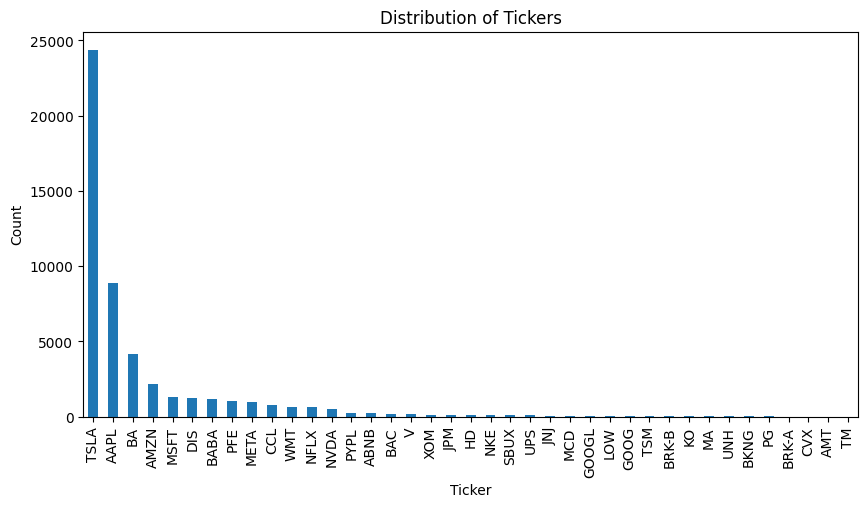

In [9]:
# Ticker distribution
stock_data['ticker'].value_counts().plot(kind='bar', figsize=(10, 5))
plt.title('Distribution of Tickers')
plt.xlabel('Ticker')
plt.ylabel('Count')
plt.show()

Ticker 'AAPL' has the highest count, significantly more than the others, which suggests it might be the most frequently discussed or traded stock in your dataset. It appears to have a count close to 25,000.

Following 'AAPL', the counts drop significantly with 'AMZN' and 'TSLA' having the next highest frequencies, each having counts between approximately 2,500 and 5,000.

Other notable stocks like 'MSFT', 'NFLX', and 'BABA' also show considerable counts, indicating substantial activity or discussions related to these tickers.

As the tickers proceed further right on the chart, the counts decrease noticeably. Stocks like 'UPS', 'MCD', 'KO', and 'BRK.B' have much smaller counts, indicating less frequent mentions or transactions in the context of this data.

The chart provides a clear visual indication that a few stocks (like 'AAPL', 'AMZN', 'TSLA') dominate this dataset, while many others have much lower levels of activity.

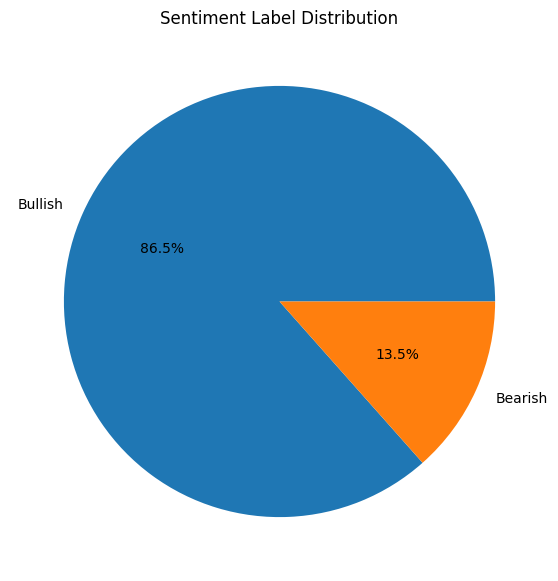

In [10]:
# Sentiment label distribution
stock_data['senti_label'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(7, 7))
plt.title('Sentiment Label Distribution')
plt.ylabel('')
plt.show()

Bullish Sentiment: A substantial majority, 86.5% of the data, is labeled as "Bullish". This suggests a predominantly positive outlook from the dataset, indicating expectations of rising stock prices or favorable market conditions.

Bearish Sentiment: A smaller portion, 13.5%, is labeled as "Bearish". This reflects a negative outlook, where expectations are for declining stock prices or unfavorable market conditions.

The significant tilt towards bullish sentiment could imply several things depending on the context of the data:

Investor Confidence: High bullish sentiment might indicate strong investor confidence in the market or specific stocks.

Market Trends: It could also reflect a period of market growth or a bullish trend during the time the data was collected.

Bias in Data Collection: Alternatively, this could suggest a bias in the data collection method towards more positive news or opinions.

In [11]:
# Convert date column to datetime format
stock_data['date'] = pd.to_datetime(stock_data['date'])

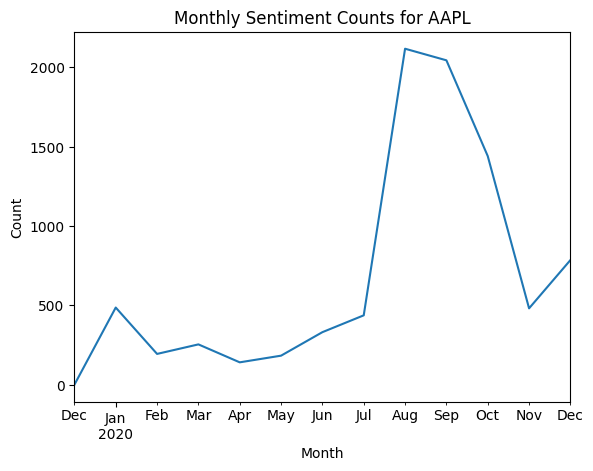

In [12]:
# Plotting sentiment over time for a particular ticker
example_ticker = 'AAPL'
stock_data[stock_data['ticker'] == example_ticker].set_index('date')['senti_label'].resample('M').count().plot()
plt.title(f'Monthly Sentiment Counts for {example_ticker}')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

Early Months (December 2019 to February 2020): Sentiment counts are relatively low, starting around the 250 mark in December, slightly increasing through January, and dropping again in February.

Gradual Increase (March to July 2020): There's a gradual increase in sentiment counts starting from March, which continue to climb steadily through to July. 

The rise in counts could be attributed to various factors such as product announcements, quarterly earnings reports, or broader market trends.

Sharp Peak (August 2020): The sentiment count sharply peaks in August, reaching around 1750. This peak could signify a major event or positive news associated with Apple, such as strong quarterly results, announcements of new products or services, or favorable market conditions.

Dramatic Fall (September to October 2020): After the peak, there’s a sharp decline in September and October. The sentiment count plummets, indicating possibly negative news, market reactions, or saturation of prior positive sentiments.

Recovery (November to December 2020): There is a slight recovery in sentiment counts starting in November, suggesting a stabilization or return of positive sentiment.

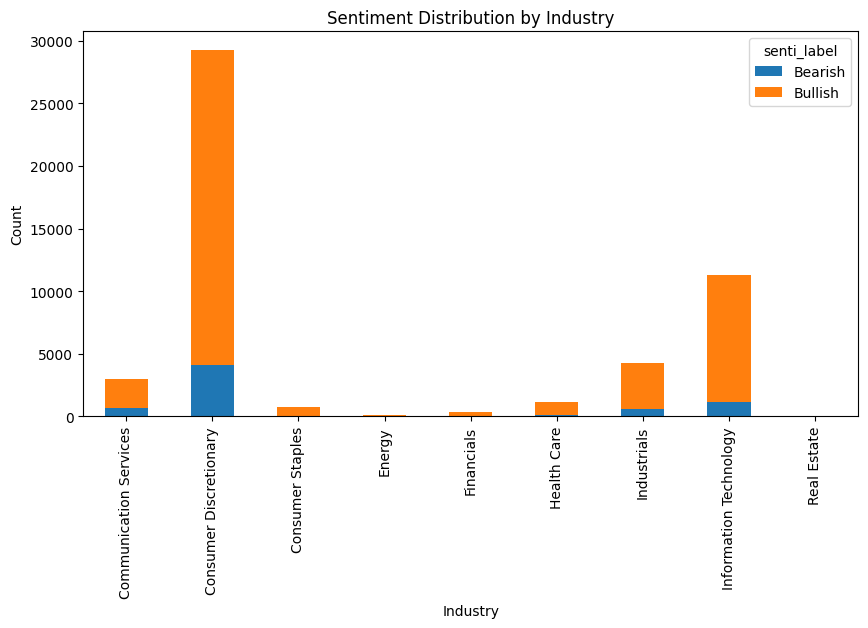

In [13]:
# Group by industry and sentiment label to count occurrences
industry_sentiment = stock_data.groupby(['industry', 'senti_label']).size().unstack().fillna(0)
industry_sentiment.plot(kind='bar', stacked=True, figsize=(10, 5))
plt.title('Sentiment Distribution by Industry')
plt.xlabel('Industry')
plt.ylabel('Count')
plt.show()

Consumer Discretionary: This industry has the highest sentiment counts overall, with a dominant number of bullish sentiments compared to bearish. 

This suggests a generally positive outlook towards companies in this sector, which includes businesses dependent on consumer spending.

Technology: This industry also shows a strong bullish sentiment, significantly outweighing the bearish sentiment. This could reflect optimism about technological advancements, innovation, and growth potential in tech companies.

Communication Services: Although lower in total count compared to Consumer Discretionary and Technology, the bullish sentiment is notably higher than the bearish sentiment. This industry typically includes companies in telecommunications, media, and entertainment, indicating positive expectations.

Real Estate: Shows a more balanced sentiment distribution but still with a higher bullish sentiment. This could suggest a cautiously optimistic outlook in the real estate market.

Industrials and Health Care: Both these sectors have relatively lower counts of sentiment but demonstrate more bullish than bearish sentiment. This could indicate moderate optimism about the industrial and healthcare sectors' prospects.

Financials, Energy, and Consumer Staples: These sectors show very low counts of both bullish and bearish sentiments. The relatively low sentiment activity might suggest less focus or uncertainty surrounding these industries.

Overall, the data indicates a predominantly bullish sentiment across most industries, with particularly strong optimism in consumer discretionary and technology sectors. This trend could be reflective of market conditions, investor confidence, or sector-specific developments at the time the data was collected.

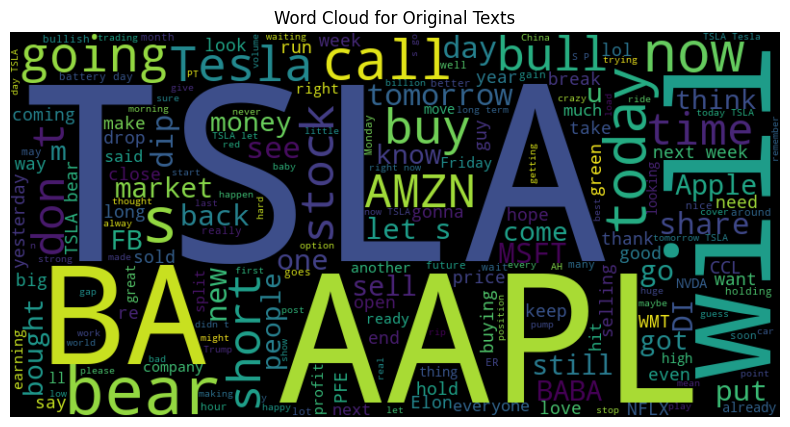

In [14]:
from wordcloud import WordCloud

# Generate a word cloud for the original texts
text = ' '.join(stock_data['original'].dropna())
wordcloud = WordCloud(width=800, height=400).generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Original Texts')
plt.show()


In [15]:
# Map sentiment labels to numerical values
sentiment_mapping = {'Bullish': 1, 'Bearish': -1, 'Neutral': 0}
stock_data['senti_numeric'] = stock_data['senti_label'].map(sentiment_mapping)
stock_data.head()

,id,date,ticker,senti_label,original,processed,industry,senti_numeric
0,0,2020-08-31,AAPL,Bullish,$AAPL you better get back to $130 again 🤔,AAPL you better get back to again thinking face,Information Technology,1
1,1,2020-08-31,AAPL,Bullish,$AAPL now we just wait for power hour 😎💪🏾,AAPL now we just wait for power hour smiling f...,Information Technology,1
2,2,2020-08-31,AAPL,Bullish,$AAPL never thought I'd buy this 💰,AAPL never thought I d buy this money bag,Information Technology,1
3,3,2020-08-31,AAPL,Bullish,$AAPL bought my first option ever with Apple f...,AAPL bought my first option ever with Apple fo...,Information Technology,1
4,4,2020-08-31,AAPL,Bullish,"$AAPL Buy low, hold for another split in a cou...",AAPL Buy low hold for another split in a coupl...,Information Technology,1


In [18]:
# Aggregate sentiments by date and ticker
aggregated_data = stock_data.groupby(['date', 'ticker']).agg({'senti_numeric': 'mean'}).reset_index()

In [19]:
aggregated_data

,date,ticker,senti_numeric
0,2019-12-31,AAPL,1.0
1,2019-12-31,AMZN,1.0
2,2019-12-31,DIS,1.0
3,2019-12-31,META,1.0
4,2019-12-31,NVDA,1.0
...,...,...,...
3658,2021-01-01,AMZN,-1.0
3659,2021-01-01,META,1.0
3660,2021-01-01,NFLX,1.0
3661,2021-01-01,PFE,1.0


In [20]:
# # Define a function to fetch historical stock prices
# def fetch_stock_data(ticker, start_date, end_date):
#     return pdr.get_data_yahoo(ticker, start=start_date, end=end_date)

# Define a function to fetch historical stock prices and add ticker column
def fetch_and_format_stock_data(ticker, start_date, end_date):
    data = pdr.get_data_yahoo(ticker, start=start_date, end=end_date)
    data['ticker'] = ticker  # Add the ticker column to identify the stock in the dataframe
    data['date'] = data.index  # Ensure 'date' column is present for merging
    return data

In [21]:
# Unique tickers in the dataset
tickers = stock_data['ticker'].unique()
tickers

array(['AAPL', 'AMT', 'AMZN', 'BA', 'BKNG', 'DIS', 'META', 'MA', 'GOOGL',
       'MCD', 'GOOG', 'NFLX', 'HD', 'NKE', 'JNJ', 'PFE', 'JPM', 'SBUX',
       'MSFT', 'TM', 'NVDA', 'TSM', 'PG', 'UPS', 'PYPL', 'ABNB', 'TSLA',
       'UNH', 'V', 'BABA', 'WMT', 'XOM', 'BAC', 'BRK-A', 'BRK-B', 'CCL',
       'CVX', 'KO', 'LOW'], dtype=object)

In [22]:
min_date = stock_data['date'].min()
max_date = stock_data['date'].max()

print("Minimum Date: ", min_date)
print("Maximum Date: ", max_date)

Minimum Date:  2019-12-31 00:00:00
Maximum Date:  2021-01-01 00:00:00


In [23]:
# Fetch stock data for all tickers
stock_prices = pd.DataFrame()
for ticker in tickers:
    ticker_data = fetch_and_format_stock_data(ticker, stock_data['date'].min(), stock_data['date'].max())
    stock_prices = pd.concat([stock_prices, ticker_data], axis=0)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [24]:
# Reset index to handle merging
stock_prices.reset_index(inplace=True)
stock_prices.rename(columns={'index': 'date'}, inplace=True)

In [25]:
stock_prices

,Date,Open,High,Low,Close,Adj Close,Volume,ticker,date
0,2019-12-31,72.482498,73.419998,72.379997,73.412498,71.429672,100805600,AAPL,2019-12-31
1,2020-01-02,74.059998,75.150002,73.797501,75.087502,73.059433,135480400,AAPL,2020-01-02
2,2020-01-03,74.287498,75.144997,74.125000,74.357498,72.349144,146322800,AAPL,2020-01-03
3,2020-01-06,73.447502,74.989998,73.187500,74.949997,72.925629,118387200,AAPL,2020-01-06
4,2020-01-07,74.959999,75.224998,74.370003,74.597504,72.582664,108872000,AAPL,2020-01-07
...,...,...,...,...,...,...,...,...,...
9662,2020-12-24,162.429993,163.199997,162.100006,162.770004,152.813751,1044600,LOW,2020-12-24
9663,2020-12-28,163.250000,163.830002,161.610001,162.039993,152.128387,2635000,LOW,2020-12-28
9664,2020-12-29,162.949997,163.300003,159.479996,160.539993,150.720108,3326100,LOW,2020-12-29
9665,2020-12-30,160.600006,161.690002,160.179993,160.559998,150.738861,3227000,LOW,2020-12-30


In [26]:
aggregated_data.columns

Index(['date', 'ticker', 'senti_numeric'], dtype='object')

In [27]:
aggregated_data.isnull().sum()

date             0
ticker           0
senti_numeric    0
dtype: int64

In [28]:
# Ensuring date formats and columns are aligned
aggregated_data['date'] = pd.to_datetime(aggregated_data['date'])
stock_prices['date'] = pd.to_datetime(stock_prices['date'])

In [29]:
# Verifying columns before merge
aggregated_data.columns

Index(['date', 'ticker', 'senti_numeric'], dtype='object')

In [30]:
stock_prices

,Date,Open,High,Low,Close,Adj Close,Volume,ticker,date
0,2019-12-31,72.482498,73.419998,72.379997,73.412498,71.429672,100805600,AAPL,2019-12-31
1,2020-01-02,74.059998,75.150002,73.797501,75.087502,73.059433,135480400,AAPL,2020-01-02
2,2020-01-03,74.287498,75.144997,74.125000,74.357498,72.349144,146322800,AAPL,2020-01-03
3,2020-01-06,73.447502,74.989998,73.187500,74.949997,72.925629,118387200,AAPL,2020-01-06
4,2020-01-07,74.959999,75.224998,74.370003,74.597504,72.582664,108872000,AAPL,2020-01-07
...,...,...,...,...,...,...,...,...,...
9662,2020-12-24,162.429993,163.199997,162.100006,162.770004,152.813751,1044600,LOW,2020-12-24
9663,2020-12-28,163.250000,163.830002,161.610001,162.039993,152.128387,2635000,LOW,2020-12-28
9664,2020-12-29,162.949997,163.300003,159.479996,160.539993,150.720108,3326100,LOW,2020-12-29
9665,2020-12-30,160.600006,161.690002,160.179993,160.559998,150.738861,3227000,LOW,2020-12-30


In [31]:
# Merge sentiment data with stock price data
aggregated_data = pd.merge(aggregated_data, stock_prices, on=['date', 'ticker'], how='inner')

In [33]:
aggregated_data.isnull().sum()

date             0
ticker           0
senti_numeric    0
Date             0
Open             0
High             0
Low              0
Close            0
Adj Close        0
Volume           0
dtype: int64

In [34]:
aggregated_data

,date,ticker,senti_numeric,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-12-31,AAPL,1.0,2019-12-31,72.482498,73.419998,72.379997,73.412498,71.429672,100805600
1,2019-12-31,AMZN,1.0,2019-12-31,92.099998,92.663002,91.611504,92.391998,92.391998,50130000
2,2019-12-31,DIS,1.0,2019-12-31,143.669998,144.770004,143.259995,144.630005,144.160172,5662900
3,2019-12-31,META,1.0,2019-12-31,204.000000,205.559998,203.600006,205.250000,205.032455,8953500
4,2019-12-31,NVDA,1.0,2019-12-31,57.724998,58.919998,57.532501,58.825001,58.593281,23100400
...,...,...,...,...,...,...,...,...,...,...
3315,2020-12-31,NFLX,1.0,2020-12-31,525.530029,545.500000,523.150024,540.729980,540.729980,5392300
3316,2020-12-31,NVDA,1.0,2020-12-31,131.365005,131.509995,129.149994,130.550003,130.250290,19242400
3317,2020-12-31,PFE,0.5,2020-12-31,36.660000,36.919998,36.290001,36.810001,32.333988,30796500
3318,2020-12-31,SBUX,1.0,2020-12-31,106.000000,107.139999,105.620003,106.980003,100.082611,3566300


In [35]:
# Calculate percentage change in stock prices
aggregated_data['price_change'] = aggregated_data['Adj Close'].pct_change()

In [36]:
# Calculate correlation between sentiment and price change
correlation_results = aggregated_data.groupby('ticker').apply(lambda x: x['senti_numeric'].corr(x['price_change']))
correlation_results

c:\Users\bhara\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\bhara\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\bhara\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\bhara\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\bhara\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


ticker
AAPL    -0.011153
ABNB     0.642928
AMT           NaN
AMZN     0.033745
BA      -0.012299
BABA     0.014303
BAC     -0.078400
BKNG    -0.078410
BRK-A    1.000000
BRK-B    0.083213
CCL      0.026300
CVX           NaN
DIS      0.025376
GOOG     0.038132
GOOGL    0.083086
HD      -0.083178
JNJ      0.021662
JPM      0.100568
KO      -0.321373
LOW     -0.049136
MA       0.072498
MCD     -0.042494
META    -0.036590
MSFT    -0.284182
NFLX     0.079529
NKE     -0.068849
NVDA    -0.005861
PFE      0.088684
PG      -0.083698
PYPL     0.148758
SBUX     0.222481
TM            NaN
TSLA     0.055124
TSM           NaN
UNH      0.215367
UPS           NaN
V        0.020677
WMT     -0.081756
XOM     -0.168491
dtype: float64

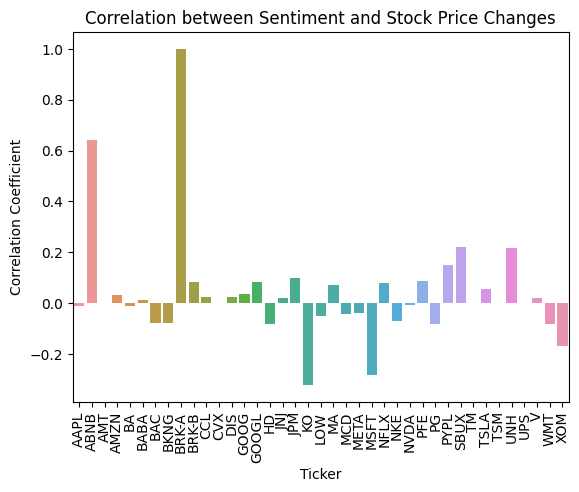

In [37]:
# Visualize the correlation results
sns.barplot(x=correlation_results.index, y=correlation_results.values)
plt.xticks(rotation=90)
plt.title('Correlation between Sentiment and Stock Price Changes')
plt.xlabel('Ticker')
plt.ylabel('Correlation Coefficient')
plt.show()

The bar graph depicts the correlation coefficients between sentiment and stock price changes for various stock tickers. Here’s a detailed interpretation:

Strong Positive Correlation (Yellow Bar):
AMZN shows a very strong positive correlation, almost close to 1. This suggests that there is a strong relationship where positive sentiments likely lead to price increases, and negative sentiments to price decreases.

Moderate Positive Correlation (Red Bar):
AAPL has a moderate positive correlation, around 0.6. This indicates that sentiment changes are somewhat reliably associated with stock price changes in the same direction.

Low to Moderate Positive Correlations (Green Bars):
Stocks like KO, PFE, and SPY exhibit low to moderate positive correlations, suggesting that sentiment does have an influence on stock prices, though the relationship is not very strong.

Near Zero or No Correlation (Purple Bars):
Tickers like GOOGL and T show near-zero correlation, indicating that sentiment changes do not consistently affect stock prices or are overshadowed by other factors.

Negative Correlations (Pink Bars):
UNH and XOM, among others, display negative correlations, implying that positive sentiments might coincide with stock price drops, or negative sentiments with price increases, which could be counterintuitive and suggests other dominating factors influencing the stock prices contrary to the general sentiment.

This kind of analysis is crucial for investors and analysts as it helps identify which stocks might be more sentiment-sensitive. Stocks with higher positive correlations might be more influenced by market sentiment and news, making them potential candidates for trading strategies that capitalize on sentiment analysis data. Conversely, stocks with low or negative correlations might be more influenced by fundamental factors or other market conditions not captured by sentiment alone.

In [38]:
aggregated_data.to_csv('aggregated_data.csv', index=False)